In [1]:
# Imports from python packages
import sys
import numpy as np
import matplotlib.pyplot as plt

# Imports from my packages (see the folder called utils)
sys.path.append('../../utils/')
from bremsstrahlung import ur_dif_cs_sp, dsig_dk_3BN
from screening import Fermi_length
from SeltzerBerger import read_data

# Style of the plot
plt.style.use('../../utils/minimal.style')
from helper_plots import ticks_real

In [2]:
# Physical parameters
Z = 47
T1 = 5.e5 # 500 MeV
g1 = 1. + T1 / 511.
Lf = Fermi_length(Z)

In [3]:
# discretization of k axis
Nk = 1000
axis_k  = np.linspace(0., g1-1., Nk)

In [4]:
# Non-relativistic cross-section with Elwert correction
cs_screen = np.array([ ur_dif_cs_sp(Z, k, g1, Lf) for k in axis_k ])
cs_screen = axis_k * cs_screen

In [5]:
# Non-relativistic cross section from 3BN Motz 1959 (no screening)
cs_unscreen = np.array([ dsig_dk_3BN(Z, g1 ,k) for k in axis_k ])

In [6]:
# Data from Seltzer and Berger
cs_absx, cs_seltzer = read_data(Z,T1)

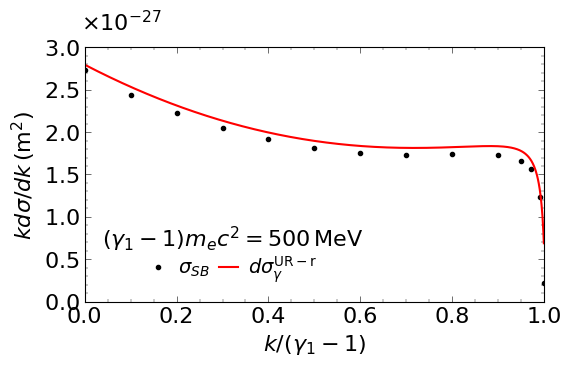

In [7]:
# Figure article
fig, axs = plt.subplots(1, 1, figsize=(6,4))
axs.plot(cs_absx,cs_seltzer, c='k', marker='o', ls='', label=r"$\sigma_{SB}$")
#axs.plot(axis_k / (g1 - 1.), cs_unscreen, c='cyan', label=r"$\sigma_{3BN}$")
axs.plot(axis_k[1:-1] / (g1 - 1.), cs_screen[1:-1], c='r', label=r"$d\sigma_{\gamma}^{\rm UR-r}$")
axs.set_xlabel(r"$ k / (\gamma_1 - 1) $")
axs.set_xlim([0.,1.])
axs.set_ylabel(r"$ k d \sigma / dk \, \rm (m^2)$")
axs.set_ylim([0.,3.e-27])
location = np.linspace(0., 3.e-27, 7)
axs.yaxis.set_ticks(location)
axs.yaxis.set_ticklabels([ticks_real(1.e27*elem,1) for elem in location])
axs.text(0.08, 1.1, r'$ \times 10^{-27} $', ha='center', va='center', transform=axs.transAxes, bbox=dict(alpha=0, facecolor="white", edgecolor="white") )
plt.legend(loc='best', ncol=2, title=r"$(\gamma_1-1)m_ec^2={:d} \, \rm MeV$".format(int(1.e-3*T1)))
plt.tight_layout()
fig.savefig("../figures/figure_3_7b", bbox_inches='tight')

plt.show()